<ipython-input-4-66619eb66a96>:46: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  candlestick_data[f'{col}_lag_{i}'] = candlestick_data[col].shift(i)
<ipython-input-4-66619eb66a96>:46: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  candlestick_data[f'{col}_lag_{i}'] = candlestick_data[col].shift(i)
<ipython-input-4-66619eb66a96>:46: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(a

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001664 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1020
[LightGBM] [Info] Number of data points in the train set: 40259, number of used features: 4
[LightGBM] [Info] Start training from score -2.944861
[LightGBM] [Info] Start training from score -2.944389
[LightGBM] [Info] Start training from score -2.944389
[LightGBM] [Info] Start training from score -2.944389
[LightGBM] [Info] Start training from score -2.944389
[LightGBM] [Info] Start training from score -2.944389
[LightGBM] [Info] Start training from score -2.944389
[LightGBM] [Info] Start training from score -2.944389
[LightGBM] [Info] Start training from score -2.944389
[LightGBM] [Info] Start training from score -2.944389
[LightGBM] [Info] Start training from score -2.944389
[LightGBM] [Info] Start training from score -2.944389
[LightGBM] [Info] Start training from score -2.944389
[LightGBM]

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


Streaming output truncated to the last 5000 lines.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posit

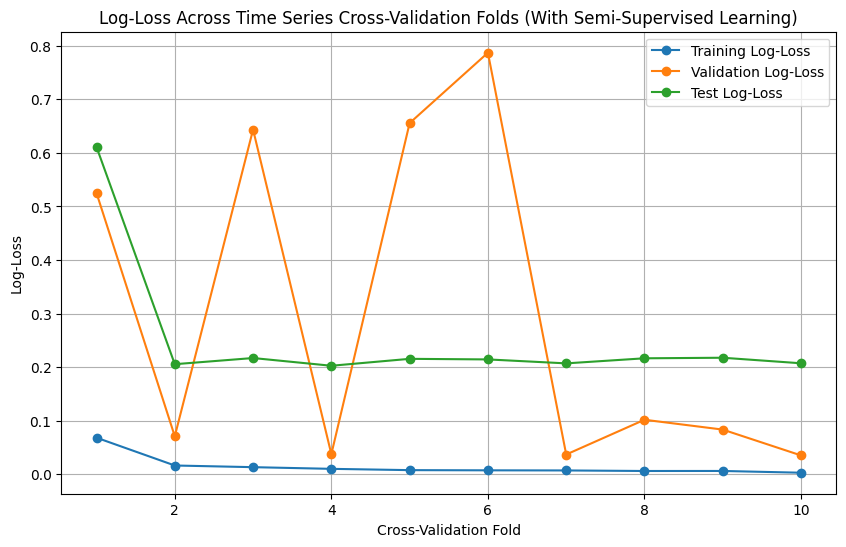

Final Log-Loss with Semi-Supervised Stacking: 0.2071
Final Accuracy with Semi-Supervised Stacking: 0.9494

Confusion Matrix with Semi-Supervised Stacking:
[[117   0   0   0   0   0   0   0   0   0   0   0   1   0   0   0   0   0
    5]
 [  0 155   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    8]
 [  0   0  82   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0]
 [  0   0   0  77   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    5]
 [  0   0   0   0   2   0   0   0   0   0   0   0   0   0   0   0   0   0
    0]
 [  0   0   0   0   0  40   0   0   0   0   0   0   0   0   0   0   0   0
    6]
 [  0   0   0   0   0   0 224   0   0   0   0   0   2   0   0   0   0   0
   21]
 [  0   0   0   0   0   0   0   5   0   0   0   0   0   0   0   0   0   0
    0]
 [  0   0   0   0   0   0   0   0   4   0   0   0   0   0   0   0   0   0
    0]
 [  0   0   0   0   0   0   0   0   0   2   0   0   0   0   0   0   0   0
    0]
 [  0   0   0   0   0   0   0   0  

ValueError: Found input variables with inconsistent numbers of samples: [2443, 2165]

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, TimeSeriesSplit
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import log_loss, accuracy_score, classification_report, confusion_matrix
from imblearn.combine import SMOTETomek
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
import lightgbm as lgb
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression

# Step 1: Load the dataset
file_path = 'refined_candlestick_patterns.csv'
candlestick_data = pd.read_csv(file_path)

# Step 2: Feature Engineering
candlestick_data['EMA_5'] = candlestick_data['Close'].ewm(span=5, adjust=False).mean()
candlestick_data['EMA_10'] = candlestick_data['Close'].ewm(span=10, adjust=False).mean()
candlestick_data['EMA_20'] = candlestick_data['Close'].ewm(span=20, adjust=False).mean()

candlestick_data['BB_Middle'] = candlestick_data['Close'].rolling(window=20).mean()
candlestick_data['BB_Upper'] = candlestick_data['BB_Middle'] + 2 * candlestick_data['Close'].rolling(window=20).std()
candlestick_data['BB_Lower'] = candlestick_data['BB_Middle'] - 2 * candlestick_data['Close'].rolling(window=20).std()

ema_12 = candlestick_data['Close'].ewm(span=12, adjust=False).mean()
ema_26 = candlestick_data['Close'].ewm(span=26, adjust=False).mean()
candlestick_data['MACD'] = ema_12 - ema_26
candlestick_data['MACD_Signal'] = candlestick_data['MACD'].ewm(span=9, adjust=False).mean()

candlestick_data['Body_Size'] = abs(candlestick_data['Close'] - candlestick_data['Open'])
candlestick_data['Upper_Wick'] = candlestick_data['High'] - candlestick_data[['Open', 'Close']].max(axis=1)
candlestick_data['Lower_Wick'] = candlestick_data[['Open', 'Close']].min(axis=1) - candlestick_data['Low']
candlestick_data['Body_Wick_Ratio'] = candlestick_data['Body_Size'] / (candlestick_data['Upper_Wick'] + candlestick_data['Lower_Wick'] + 1e-6)

# Step 3: Create deeper sliding window features (10 candles back)
window_size = 10
columns_to_shift = ['Open', 'High', 'Low', 'Close', 'Volume', 'EMA_5', 'EMA_10', 'EMA_20', 'MACD', 'MACD_Signal']

for i in range(1, window_size):
    for col in columns_to_shift:
        candlestick_data[f'{col}_lag_{i}'] = candlestick_data[col].shift(i)

# Drop rows with NaN values
candlestick_data.dropna(inplace=True)

# Step 4: Encode categorical columns: 'Trend' and 'Candlestick Pattern'
label_encoder_trend = LabelEncoder()
candlestick_data['Trend'] = label_encoder_trend.fit_transform(candlestick_data['Trend'])

label_encoder_pattern = LabelEncoder()
candlestick_data['Candlestick Pattern'] = label_encoder_pattern.fit_transform(candlestick_data['Candlestick Pattern'])

# Step 5: Data Augmentation (Jittering and Scaling)
def augment_data(data, jitter_factor=0.01, scale_factor=0.05, n_augmentations=2):
    augmented_data = []
    for _ in range(n_augmentations):
        jittered_data = data.copy()
        jittered_data['Open'] *= (1 + jitter_factor * np.random.randn(len(data)))
        jittered_data['High'] *= (1 + jitter_factor * np.random.randn(len(data)))
        jittered_data['Low'] *= (1 + jitter_factor * np.random.randn(len(data)))
        jittered_data['Close'] *= (1 + jitter_factor * np.random.randn(len(data)))
        scaling_factor = 1 + scale_factor * np.random.randn()
        jittered_data[['Open', 'High', 'Low', 'Close']] *= scaling_factor
        augmented_data.append(jittered_data)
    augmented_data = pd.concat([data] + augmented_data, ignore_index=True)
    return augmented_data

# Apply data augmentation
augmented_candlestick_data = augment_data(candlestick_data, jitter_factor=0.01, scale_factor=0.05, n_augmentations=3)

# Step 6: Separate features and target variable
X = augmented_candlestick_data.drop(columns=['Start', 'End', 'Candlestick Pattern'])
y = augmented_candlestick_data['Candlestick Pattern']

# Normalize numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 7: Split the dataset into training, testing, and unlabeled data for semi-supervised learning
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)
X_labeled, X_unlabeled, y_labeled, y_unlabeled = train_test_split(X_train, y_train, test_size=0.3, random_state=42, stratify=y_train)

# Step 8: Apply SMOTE with Tomek Links to handle class imbalance on labeled data
smote_tomek = SMOTETomek(smote=SMOTE(k_neighbors=1), random_state=42)
X_resampled, y_resampled = smote_tomek.fit_resample(X_labeled, y_labeled)

# Step 9: Apply PCA for Dimensionality Reduction
pca = PCA(n_components=0.95)
X_resampled_pca = pca.fit_transform(X_resampled)
X_unlabeled_pca = pca.transform(X_unlabeled)
X_test_pca = pca.transform(X_test)

# Step 10: Define base models for stacking
estimators = [
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('xgb', xgb.XGBClassifier(n_estimators=100, random_state=42)),
    ('lgbm', lgb.LGBMClassifier(n_estimators=100, random_state=42))
]

# Step 11: Define stacking classifier
stack_classifier = StackingClassifier(
    estimators=estimators,
    final_estimator=LogisticRegression(),
    cv=5
)

# Step 12: Initial training on labeled data
stack_classifier.fit(X_resampled_pca, y_resampled)

# Step 13: Pseudo-labeling for unlabeled data
unlabeled_pred_prob = stack_classifier.predict_proba(X_unlabeled_pca)
confidence_threshold = 0.9
confident_indices = np.max(unlabeled_pred_prob, axis=1) > confidence_threshold
pseudo_labels = np.argmax(unlabeled_pred_prob[confident_indices], axis=1)

# Step 14: Evaluate pseudo-label quality
pseudo_label_accuracy = accuracy_score(y_unlabeled[confident_indices], pseudo_labels)
print(f"Pseudo-Label Quality (Accuracy on Unlabeled Data): {pseudo_label_accuracy:.4f}")

# Step 15: Combine labeled and pseudo-labeled data
X_combined = np.concatenate([X_resampled_pca, X_unlabeled_pca[confident_indices]])
y_combined = np.concatenate([y_resampled, pseudo_labels])

# Step 16: Retrain the stacking model with combined data
stack_classifier.fit(X_combined, y_combined)

# Step 17: Cross-validation log-loss tracking
log_losses_train = []
log_losses_val = []
log_losses_test = []

# Get the full list of class labels
class_labels = np.arange(len(label_encoder_pattern.classes_))

# TimeSeriesSplit for cross-validation
tscv = TimeSeriesSplit(n_splits=10)

for train_index, val_index in tscv.split(X_resampled_pca):
    X_train_cv, X_val_cv = X_resampled_pca[train_index], X_resampled_pca[val_index]
    y_train_cv, y_val_cv = y_resampled[train_index], y_resampled[val_index]

    # Train the stacking model on PCA-transformed features
    stack_classifier.fit(X_train_cv, y_train_cv)

    # Predict probabilities for log-loss calculation (Training set)
    y_train_pred_prob = stack_classifier.predict_proba(X_train_cv)
    train_log_loss = log_loss(y_train_cv, y_train_pred_prob, labels=class_labels)
    log_losses_train.append(train_log_loss)

    # Predict probabilities for log-loss calculation (Validation set)
    y_val_pred_prob = stack_classifier.predict_proba(X_val_cv)

    # Ensure predicted probabilities have the same number of classes as the label set
    if len(np.unique(y_val_cv)) < len(class_labels):
        y_val_pred_prob_fixed = np.zeros((y_val_pred_prob.shape[0], len(class_labels)))
        y_val_pred_prob_fixed[:, :y_val_pred_prob.shape[1]] = y_val_pred_prob
        y_val_pred_prob = y_val_pred_prob_fixed

    # Calculate log-loss for the validation set
    val_log_loss = log_loss(y_val_cv, y_val_pred_prob, labels=class_labels)
    log_losses_val.append(val_log_loss)

    # Predict probabilities for log-loss calculation (Test set)
    y_test_pred_prob = stack_classifier.predict_proba(X_test_pca)
    test_log_loss = log_loss(y_test, y_test_pred_prob, labels=class_labels)
    log_losses_test.append(test_log_loss)

# Continue with the rest of the code for plotting and final evaluation


# Step 18: Plot log-loss graph
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(log_losses_train) + 1), log_losses_train, marker='o', label='Training Log-Loss')
plt.plot(range(1, len(log_losses_val) + 1), log_losses_val, marker='o', label='Validation Log-Loss')
plt.plot(range(1, len(log_losses_test) + 1), log_losses_test, marker='o', label='Test Log-Loss')
plt.xlabel('Cross-Validation Fold')
plt.ylabel('Log-Loss')
plt.title('Log-Loss Across Time Series Cross-Validation Folds (With Semi-Supervised Learning)')
plt.legend()
plt.grid(True)
plt.show()
# Get the full list of class labels from the label encoder
class_labels = np.arange(len(label_encoder_pattern.classes_))

# Ensure that all classes are passed to log_loss, confusion_matrix, and classification_report
# Step 19: Final Evaluation of the Stacking Model on the Test Set
y_test_pred_stack = stack_classifier.predict(X_test_pca)
y_test_pred_prob_stack = stack_classifier.predict_proba(X_test_pca)

# Calculate log-loss and accuracy for the test set, providing the full list of classes
final_log_loss_stack = log_loss(y_test, y_test_pred_prob_stack, labels=class_labels)
final_accuracy_stack = accuracy_score(y_test, y_test_pred_stack)

# Print final log-loss and accuracy for the stacking model after semi-supervised learning
print(f"Final Log-Loss with Semi-Supervised Stacking: {final_log_loss_stack:.4f}")
print(f"Final Accuracy with Semi-Supervised Stacking: {final_accuracy_stack:.4f}")

# Step 20: Confusion Matrix and Classification Report for the Stacking Model
conf_matrix_stack = confusion_matrix(y_test, y_test_pred_stack, labels=class_labels)
classification_report_stack = classification_report(y_test, y_test_pred_stack, labels=class_labels, target_names=label_encoder_pattern.classes_)

# Print the Confusion Matrix and Classification Report
print("\nConfusion Matrix with Semi-Supervised Stacking:")
print(conf_matrix_stack)

print("\nClassification Report with Semi-Supervised Stacking:")
print(classification_report_stack)


In [ ]:
# Step 21: Optional Pseudo-Label Accuracy for Evaluation (if required)
# Evaluate pseudo-label quality on the remaining unlabeled data if available
if len(np.setdiff1d(np.arange(len(y_unlabeled)), confident_indices)) > 0:
  # Ensure remaining pseudo-labels and true labels match in size
  remaining_unlabeled_indices = np.setdiff1d(np.arange(len(y_unlabeled)), confident_indices)

  # Generate new pseudo-labels for the remaining unlabeled data
  remaining_pred_prob = stack_classifier.predict_proba(X_unlabeled_pca[remaining_unlabeled_indices])
  remaining_pseudo_labels = np.argmax(remaining_pred_prob, axis=1)

  # Calculate accuracy by comparing remaining true labels with remaining pseudo-labels
  remaining_pseudo_label_accuracy = accuracy_score(y_unlabeled.iloc[remaining_unlabeled_indices], remaining_pseudo_labels)

  print(f"Remaining Pseudo-Label Accuracy: {remaining_pseudo_label_accuracy:.4f}")


Remaining Pseudo-Label Accuracy: 0.9505
